
# garima zomato data analysis project


first have to import the libraries

In [3]:
import numpy as np  # used for numerical operation
import pandas as pd # used for data manipulation and analysis
import matplotlib.pyplot as plt # used for data visulaization
import seaborn as sns # used for data visualization

creating dataframe


In [6]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## let's convert the data type of the "rate" column to float and remove the denominator

In [9]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


summaryof the dataframe

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# conclusion: 
there is no null value in dataframe as we can see.
no duplicate
so data cleaning is done
now we can perform operatios to get our answers

# question:
what type of restaurant do the majority fo customers order from?



-> here we have to check from which type fo resturant customer order maximum times so we can create a simple bar graph in x axis we will take type of resturant and in y axis we can take the count so whichever count is maximum from that type customer is ordering much.

Text(0.5, 0, 'Type of resturant')

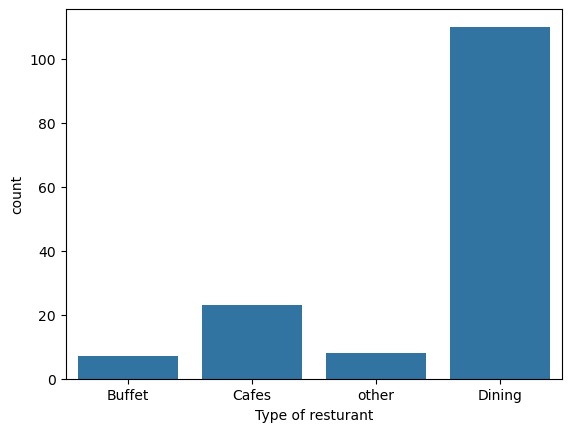

In [13]:
sns.countplot(x=dataframe['listed_in(type)'])  # we are using seaborn to create a graph
plt.xlabel("Type of resturant")

# answer:
dining

-> we can see dining has maximum number of count
 the majority of the restaurants fall into the dining category.
 dining restaurants are preferred by a large number of individuals.

# questions:

how many votes has each type of restauran received fro customers?

-> here we have to analysis how many votes each type of reataurants are gettion. so for that again we can create a line graph in which, x-axis will be type of restaurant and y-axis will be the votes.

Text(0, 0.5, 'Votes')

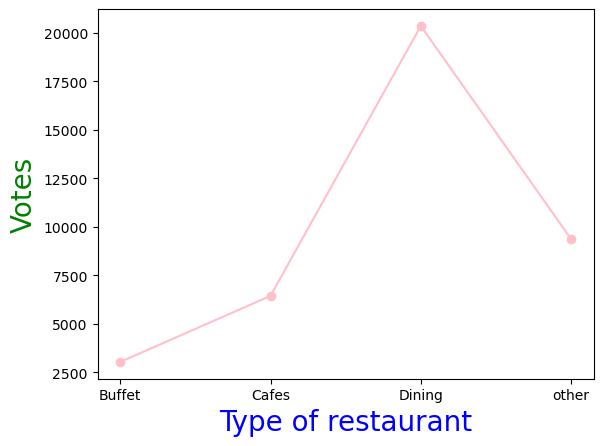

In [19]:
# first we are using group by for the sumession of the votes according to the type of resturants
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
# now making a key value for x and y axis
result = pd.DataFrame({"votes": grouped_data})
# now ploating a line graph
plt.plot(result, c="pink", marker="o")
# giving title
plt.xlabel("Type of restaurant", c="blue", size=20)
plt.ylabel("Votes", c="green", size=20)


# answer:
 we can see for each restaurant how many votes they are getting.

from here we can make a analysis that dinning restaurant is perfoming better than comparision to other resturants.

# question:

what are the ratings that the majority of restaurants have received?

-> here we have to analysis the average rating the the resurants are receiving. so we can create a histogram in which we can pass our rate column to see the maximum rating lies on which range

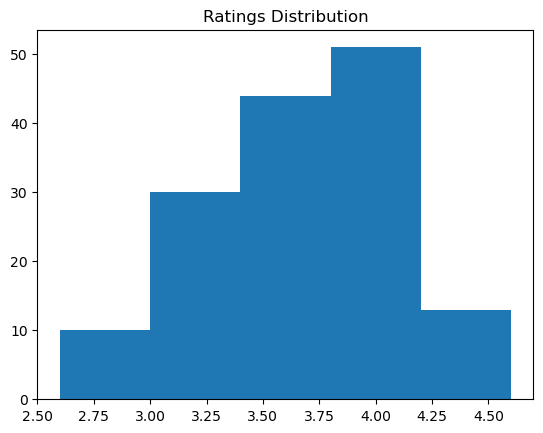

In [21]:
# creating a histogram and passing rate column
plt.hist(dataframe['rate'],bins = 5)
plt.title("Ratings Distribution") # giving title
plt.show()


# answer:

the majority of restaurant received ratings ranging from 3.5 to 4.


# question

zomato has observed taht most couples order most of their food online. what is their average spending on each order?